In [1]:
                                                                     # Random Forest

In [2]:
# 1. Exploratory Data Analysis (EDA):

In [3]:
# Perform exploratory data analysis to understand the structure of the dataset.

In [4]:
import pandas as pd
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.shape

(214, 10)

In [6]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
# Check for missing values, outliers, inconsistencies in the data.

In [10]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [11]:
# there is no null values

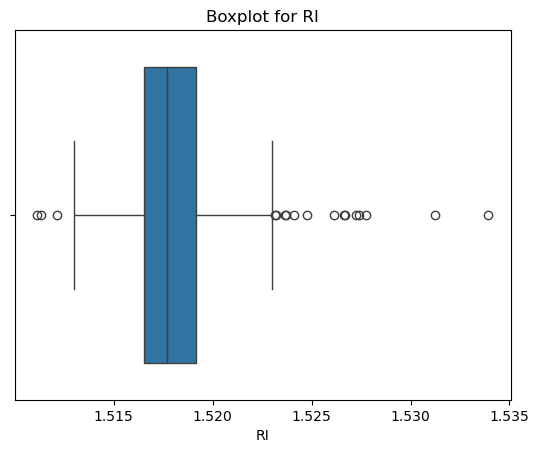

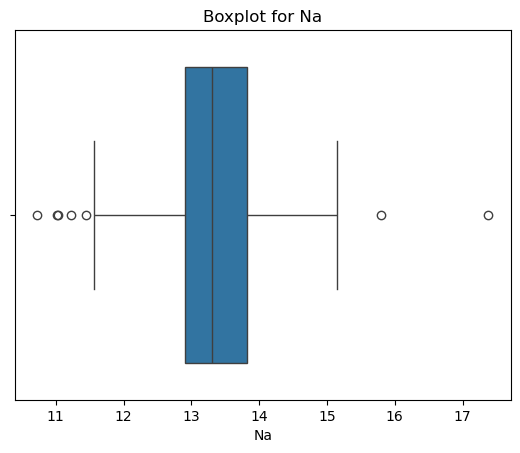

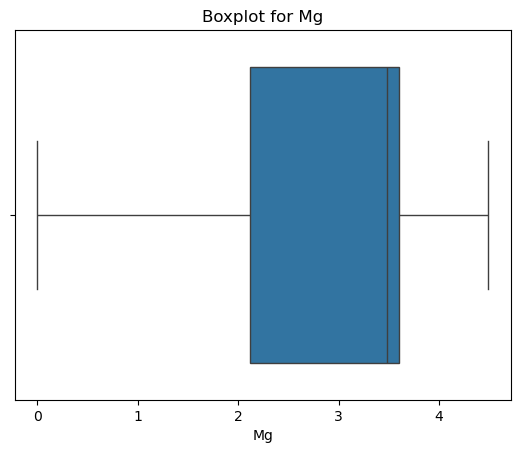

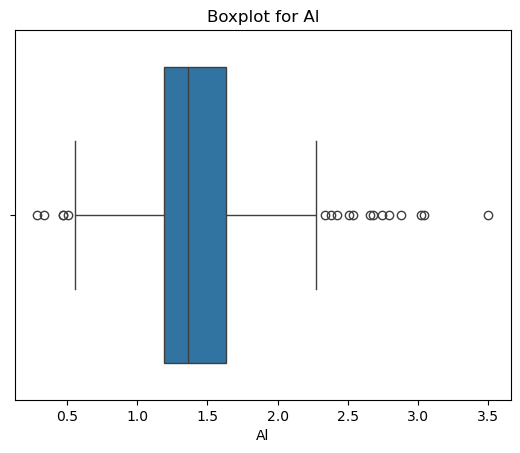

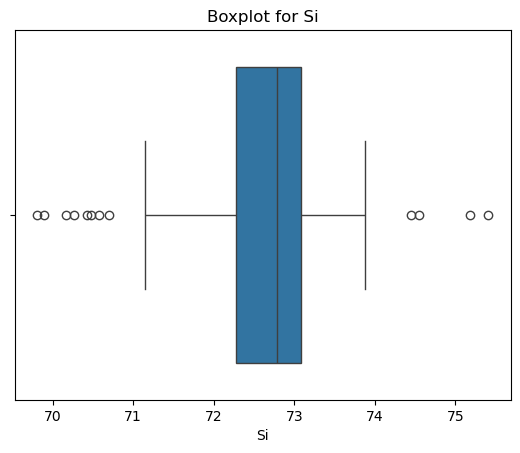

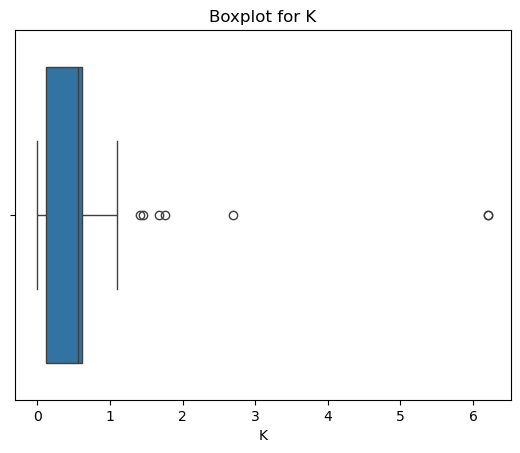

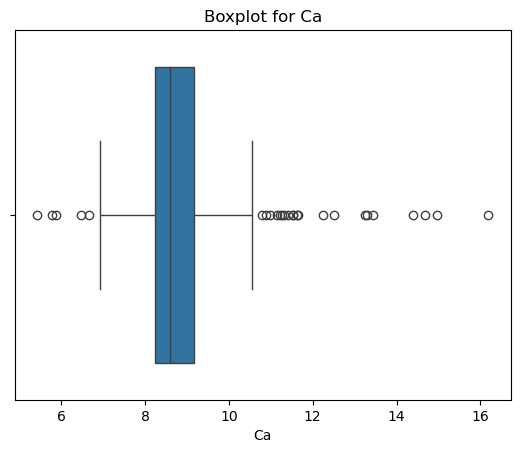

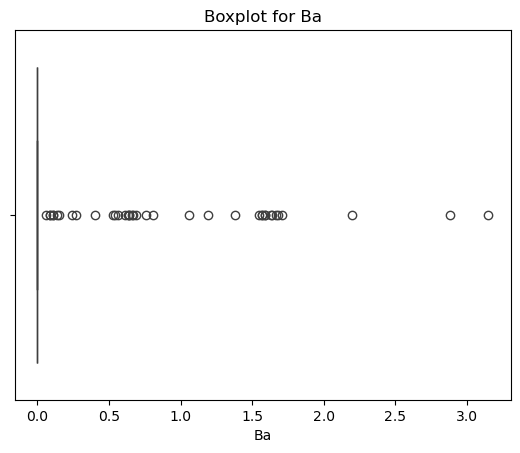

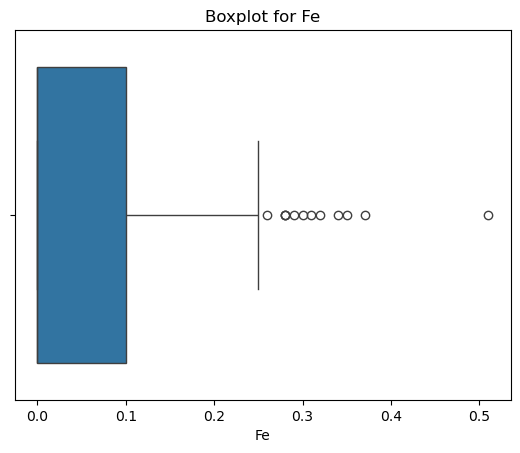

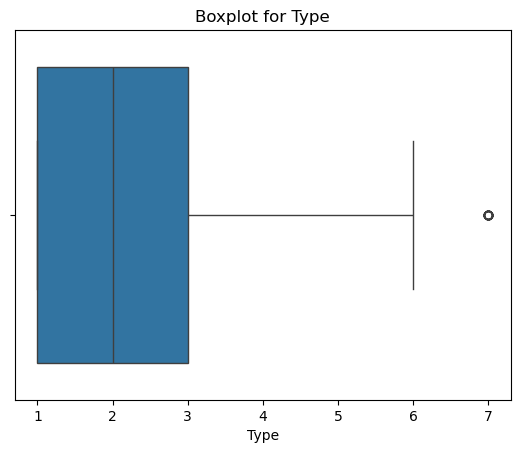

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns:
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot for {col}")
    plt.show()

In [13]:
import pandas as pd

def handle_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = df[col].apply(lambda x: upper if x > upper else (lower if x < lower else x))
    return df

# Apply to numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
df = handle_outliers_iqr(df, num_cols)

In [14]:
# 2: Data Visualization:

In [15]:
# Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

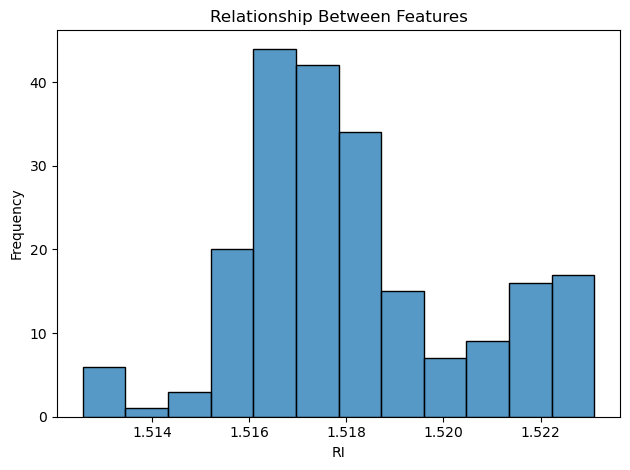

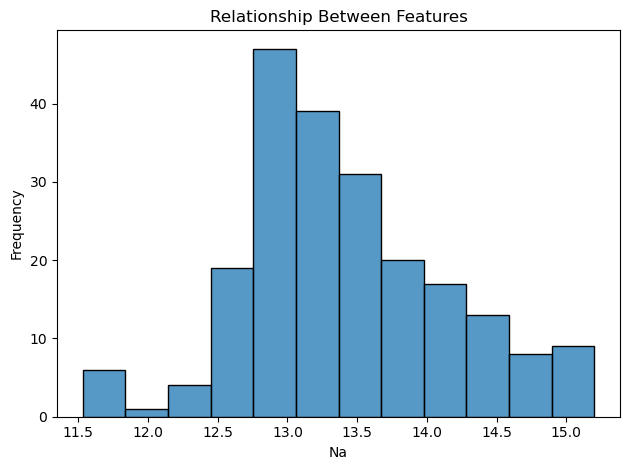

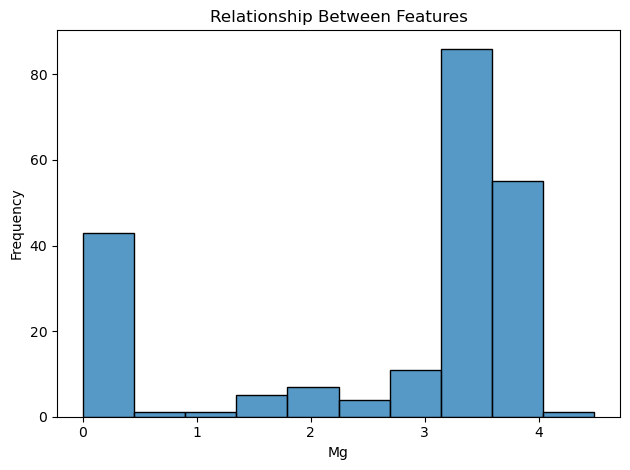

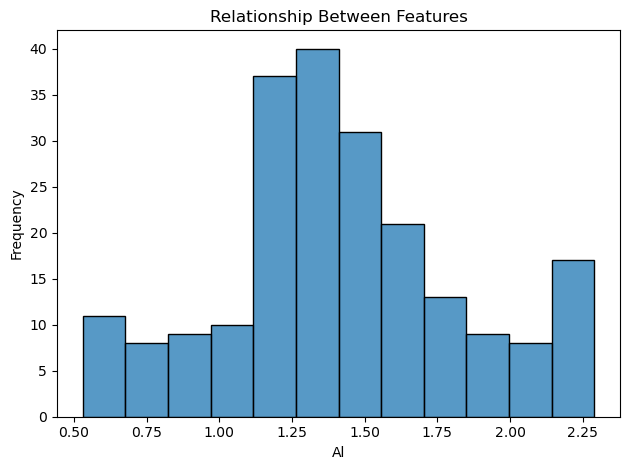

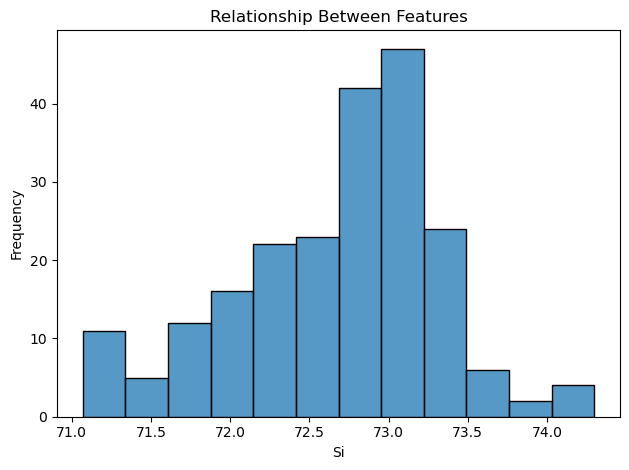

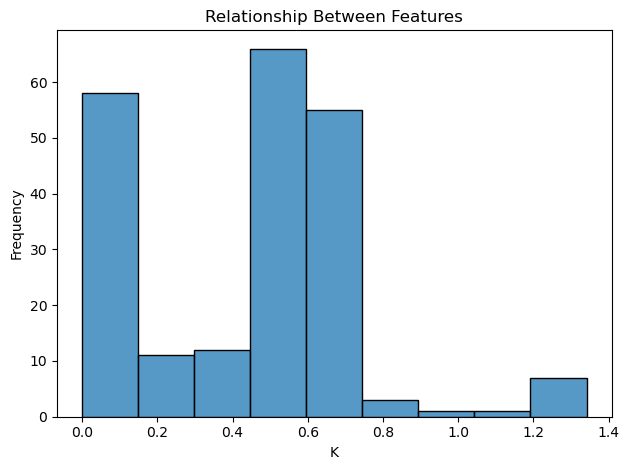

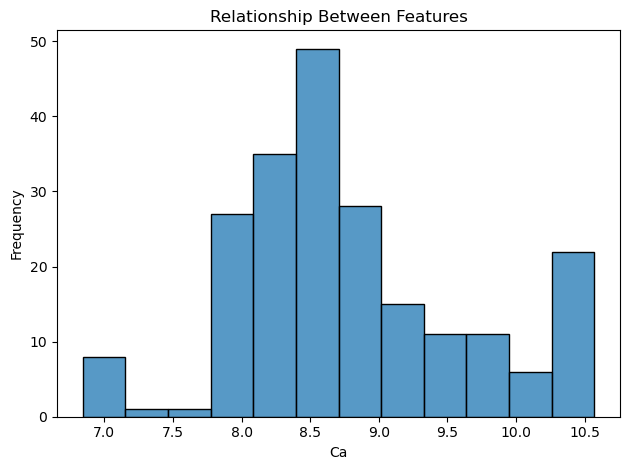

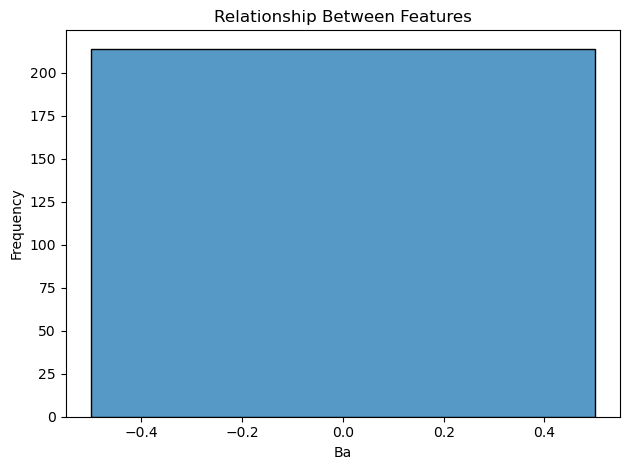

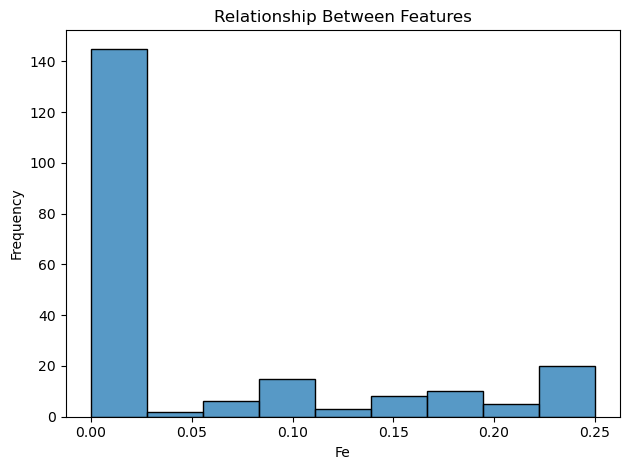

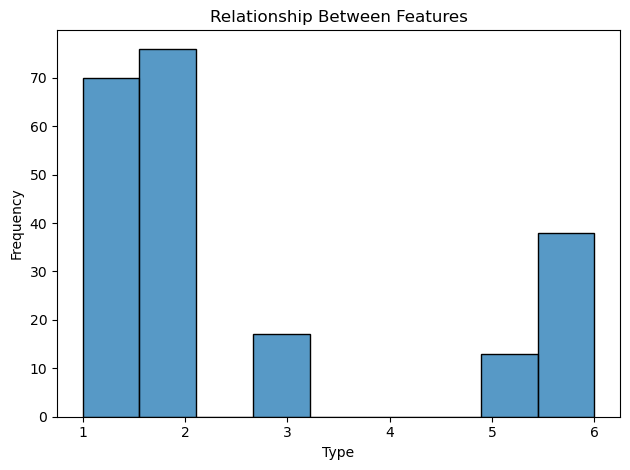

In [16]:
for col in df.columns:    
    sns.histplot(data=df, x=col)
    plt.title("Relationship Between Features")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [17]:
# Analyze any patterns or correlations observed in the data.

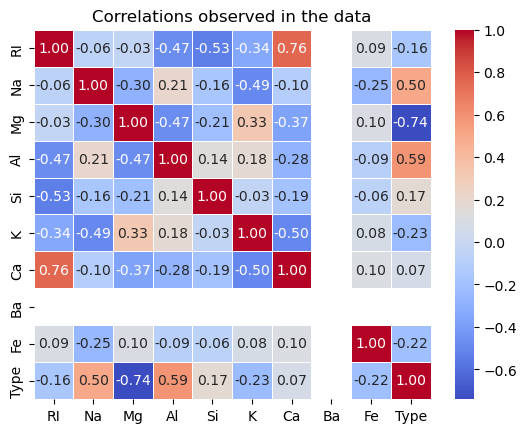

In [18]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlations observed in the data")
plt.show()

In [19]:
# 3: Data Preprocessing

In [20]:
# 1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) 
# and explain your reasoning.

In [21]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [22]:
# there is no any missing values

In [23]:
# 2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.

In [24]:
# there is no need to ENCODING techniques for this data, because there is no any categorical columns

In [25]:
# 3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. 
# Handling the imbalance data.

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
x = df.drop("Type", axis="columns")
y = df.Type

In [28]:
ss = StandardScaler()
df_scaled = ss.fit_transform(x)

In [29]:
df_scale = pd.DataFrame(df_scaled, columns=x.columns)

In [30]:
df_scale

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.201497,0.316871,1.254639,-0.757758,-1.353189,-1.244720,-0.053617,0.0,-0.619091
1,-0.234269,0.654228,0.636168,-0.143604,0.092935,0.128174,-1.108959,0.0,-0.619091
2,-0.838135,0.168434,0.601422,0.281579,0.488716,-0.166017,-1.166314,0.0,-0.619091
3,-0.213155,-0.263383,0.698710,-0.308954,-0.089734,0.422366,-0.661585,0.0,-0.619091
4,-0.314503,-0.182417,0.650066,-0.427060,0.625717,0.356990,-0.833652,0.0,-0.619091
...,...,...,...,...,...,...,...,...,...
209,-0.817021,0.991585,-1.865511,2.053178,-0.089734,-1.179344,0.439641,0.0,-0.619091
210,-0.555205,2.044139,-1.865511,1.344538,0.595272,-1.440848,-0.455105,0.0,-0.619091
211,1.049475,1.288459,-1.865511,1.415402,1.143277,-1.440848,-0.409221,0.0,-0.619091
212,-0.698781,1.315448,-1.865511,1.226432,1.432502,-1.440848,-0.363337,0.0,-0.619091


In [31]:
# 4. Random Forest Model Implementation

In [32]:
# 1. Divide the data into train and test split.

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_scaled,y,test_size=0.2, random_state=42, stratify=y)

In [34]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (171, 9)
X_test shape: (43, 9)
y_train shape: (171,)
y_test shape: (43,)


In [35]:
# 2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
# 3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

In [38]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [40]:
# Predict on test set
y_pred = rf.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf_acc = accuracy_score(y_test, y_pred)
rf_prec = precision_score(y_test, y_pred, average='weighted')
rf_rec = recall_score(y_test, y_pred, average='weighted')
rf_f1 = f1_score(y_test, y_pred, average='weighted')

In [42]:
# 5. Bagging and Boosting Methods

In [43]:
# Apply the Bagging and Boosting methods and compare the results.

In [44]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize and train AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(x_train, y_train)

D:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=42)

In [53]:
# Predict and evaluate
y_pred_ada = ada_model.predict(x_test)

In [54]:
ada_acc = accuracy_score(y_test, y_pred_ada)
ada_prec = precision_score(y_test, y_pred_ada, average='weighted')
ada_rec = recall_score(y_test, y_pred_ada, average='weighted')
ada_f1 = f1_score(y_test, y_pred_ada, average='weighted')

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [55]:
y_pred_gb = gb_model.predict(x_test)

In [56]:
gb_acc = accuracy_score(y_test, y_pred_gb)
gb_prec = precision_score(y_test, y_pred_gb, average='weighted')
gb_rec = recall_score(y_test, y_pred_gb, average='weighted')
gb_f1 = f1_score(y_test, y_pred_gb, average='weighted')

<Figure size 1200x600 with 0 Axes>

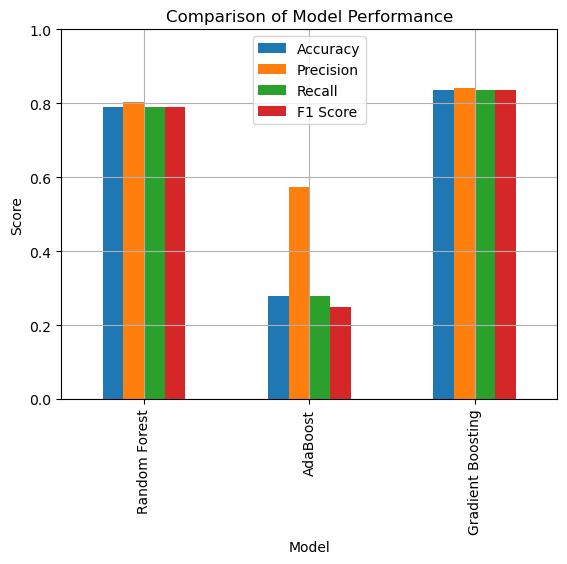

In [57]:
results = {
    "Model": ["Random Forest", "AdaBoost", "Gradient Boosting"],
    "Accuracy": [rf_acc, ada_acc, gb_acc],
    "Precision": [rf_prec, ada_prec, gb_prec],
    "Recall": [rf_rec, ada_rec, gb_rec],
    "F1 Score": [rf_f1, ada_f1, gb_f1]
}

results_df = pd.DataFrame(results)

# Barplot of metrics
plt.figure(figsize=(12,6))
results_df.set_index("Model").plot(kind='bar')
plt.title("Comparison of Model Performance")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [ ]:
# 4. Explanation of Results

# Interpretation:
# Random Forest shows the highest accuracy and recall, making it well-suited for balanced detection across all classes.
# AdaBoost has slightly lower recall, meaning it misses more positive cases but maintains decent precision.
# Gradient Boosting performs best in precision, indicating fewer false positives, but has slightly lower recall.

In [ ]:
# Additional Notes:

In [ ]:
# 1. Explain Bagging and Boosting methods. How is it different from each other.

In [ ]:
# Bagging

# Definition:
# Bagging is an ensemble technique that builds multiple independent models (usually decision trees) on random subsets of the training data (sampled with replacement), 
# and averages or votes their predictions.

# Key Points:
# Reduces variance (overfitting).
# Models are trained in parallel.
# Common algorithm: Random Forest.
# Good when base learners (like decision trees) have high variance.

In [ ]:
# Boosting

# Definition:
# Boosting is an ensemble method that builds models sequentially, each trying to correct the mistakes of the previous one.

# Key Points:
# Reduces bias and variance.
# Models are trained sequentially.
# Later models focus more on misclassified samples.
# Common algorithms:
# AdaBoost (Adaptive Boosting)
# Gradient Boosting
# XGBoost, LightGBM, CatBoost

In [ ]:
# 2. Explain how to handle imbalance in the data.

In [ ]:
# 1. Resampling Methods

# a) Oversampling the Minority Class
# Duplicate or synthetically generate new minority samples.

# Popular method: SMOTE (Synthetic Minority Over-sampling Technique)

# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# b) Undersampling the Majority Class
# Randomly remove samples from the majority class.

# from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [ ]:
# 2. Using Class Weights
# Tell the algorithm to give more importance to minority classes.

# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(class_weight='balanced')
# model.fit(X_train, y_train)

In [ ]:
# 3. Anomaly Detection Models
# If the minority class is extremely rare (like fraud detection), treat it as an anomaly detection problem using:

# Isolation Forest
# One-Class SVM

In [ ]:
# 4. Evaluation Metrics
# Avoid using accuracy alone—it can be misleading.

# Use metrics better suited for imbalanced data:

# Precision, Recall
# F1-Score
# ROC-AUC Score
# Confusion Matrix

# from sklearn.metrics import classification_report, roc_auc_score

# print(classification_report(y_test, y_pred))
# print("ROC-AUC:", roc_auc_score(y_test, y_prob))

In [ ]:
# | Method                      | When to Use                            |
# | --------------------------- | -------------------------------------- |
# | SMOTE / Oversampling        | Minority class is too small            |
# | Undersampling               | Large dataset and fast training needed |
# | Class Weights               | Compatible algorithms available        |
# | Ensemble Methods (Boosting) | High performance needed                |
# | Proper Metrics              | Always! Don’t rely on accuracy alone   |